# Chapter 2. Data and sampling distributions

## 2.1 Random sampling and sample bias

Random sampling is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw

Data quality often matters more than data quantity when making an estimate or a model based on a sample. Data quality in data science involves completeness, consistency of format, cleanliness, and accuracy of individual data points. Statistics adds the notion of representativeness

Self-selection sampling bias: like customer reviews, people submitting reviews are not randomly selected, rather, they themselves have taken the initiative to write. The people motivated to write reviews may have had poor experiences, may have an association with the establishment, or may simply be a different type of person from those who do not write reviews

### Bias

Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process

### Random selection

Random sampling and stratified sampling

### Size versus quality: when does size matter?

Scenario for the value of big data: when the data is not only big but sparse as well

Such as google search

### Sample mean versus population mean

Information about samples is observed, and information about large populations is often inferred from smaller samples

## 2.2 Selection bias

Selection bias: bias resulting from the way in which observations are selected

Data snooping: extensive hunting through data in search of something interesting 

Vast search effect: bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables

Forms of selection bias: vast search effect, nonrandom sampling, cherry-picking data, selection of time intervals that accentuate a particular statistical effect, stopping an experiment when the results look interesting

### Regression to the mean

Regression to the mean: a phenomenon involving successive measurements on a given variable, extreme observations tend to be followed by more central ones

Regression to the mean, meaning to 'go back', is distinct from the statistical modeling method of linear regression, in which a linear relationship is estimated between predictor variables and an outcome variable

## 2.3 Sampling distribution of a statistic

**Sampling distribution of a statistic** refers to the distribution of some sample statistics over many samples drawn from the same population

Sample statistic: a metric calculated for a sample of data drawn from a larger population

Data distribution: the frequency distribution of individual values in a dataset

Central limit theorem: the tendency of the sampling distribution to take on a normal shape as sample size rises

Standard error: the variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values)

It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution

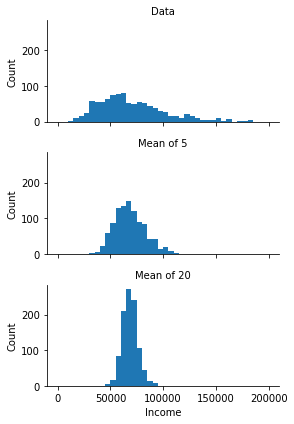

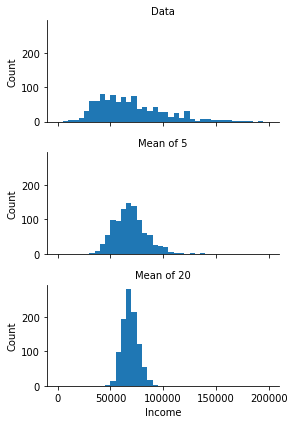

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loans_income.csv',
                           squeeze=True)

sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data',
})

sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col = 'type', col_wrap = 1, height = 2, aspect = 2)
g.map(plt.hist, 'income', range = [0, 200000], bins = 40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.show()

### Central limit theorem

Central limit theorem: the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great

The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference, that is, confidence intervals and hypotheses tests

### Standard error

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic

Standard error = SE = s / √n

1. Collect a number of brand-new samples from the population
2. For each new sample, calculate the statistic (e.g., mean)
3. Calculate the standard deviation of the statistic computed in step 2, use this as the estimate of standard error

Bootstrap does not rely on central limit theorem or other distributional assumptions 

## 2.4 The bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample

Resampling: the process of taking repeated samples from observed data, includes both bootstrap and permutation (shuffling) procedures

The algorithm for a bootstrap resampling of the mean, for a sample size n:
1. Draw a sample value, record it, and then replace it
2. Repeat n times
3. Record the mean of the n resampled values
4. Repeat steps 1-3 R times
5. Use the R result to: a. Calculate their standard deviation (this estimates sample mean standard error. b. Produce a histogram or boxplot. c. Find a confidence interval

In [21]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -100.95650000000023
std.error: 253.75276120974834


The bootstrap can be used with multivariate data, where the rows are sampled as units. A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. With classification and regression trees, running multiple trees on bootstrap samples and then averaging their prediction (or with classification, taking a majority vote) generally performs better than using a single tree. This process is called bagging, short for bootstrap aggregating 

### Resampling versus bootstrapping

Sometimes the term resampling is used synonymously with the term bootstrapping. More often, the term resampling also includes permutation procedures, where multiple samples are combined and the sampling may be done without replacement. In any case, the term bootstrap always implies sampling with replacement from an observed data set

## 2.5 Confidence intervals

The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest 

an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time when a similar sampling procedure is followed

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is:
1. Draw a random sample of size n with replacement from the data (a resample)
2. Record the statistic of interest for the resample
3. Repeat steps 1-2 many (R) times
4. For an %x confidence interval, trim [(100-x)/2]% of the R resample results from either end of the distribution
5. The trim points are the endpoints of an %x bootstrap confidence interval

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters 

Confidence intervals are also referenced generated by formulas, especially the t-distribution

## 2.6 Normal distribution

1. 68% of the data are within 1 standard deviation
2. 95% of the data are within 2 standard deviations
3. 99.7% of the data are within 3 standard deviations

The normal distribution is also referred to as a Gaussian distribution

### Standard normal and QQ-plots

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean

To compare data to a standard normal distribution, subtract the mean and then divide by the standard deviation, this is called normalization or standardization

The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution

A QQ-plot is used to visually determine how close a sample is to a specified distribution, the normal distribution

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

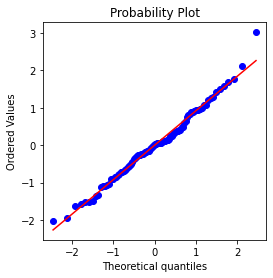

In [29]:
import scipy
fig, ax = plt.subplots(figsize = (4,4))
norm_sample = scipy.stats.norm.rvs(size = 100)
scipy.stats.probplot(norm_sample, plot = ax)

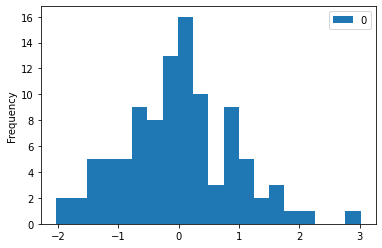

In [37]:
pd.DataFrame(norm_sample).plot.hist(bins = 20)

Converting data to z-scores (standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often for comparison purposes

## 2.7 Long-tailed distributions

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727063, 0.0015561067366313156, 0.9941828221936324))

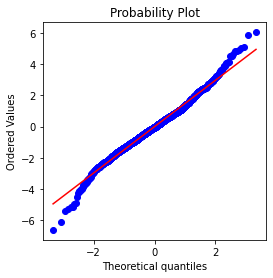

In [41]:
import numpy as np
sp500_px = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/sp500_data.csv')
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))
fig, ax = plt.subplots(figsize = (4,4))
scipy.stats.probplot(nflx, plot = ax)

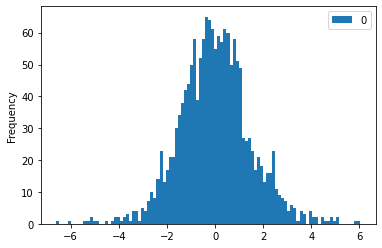

In [44]:
pd.DataFrame(nflx).plot.hist(bins = 100)

The points are close to the line for the data within one standard deviation of the mean. As data being normal in the middle but having much longer tails

There is much statistical literature about the task of fitting statistical distributions to observed data. Beware an excessively data-centric approach to this job, which is as much art as science. Data is variable, and often consistent, on its face, with more than one shape and type of distribution. It is typically the case that domain and statistical knowledge must be brought to bear to determine what type of distribution is appropriate to model a given situation. For example, we might have data on the level of internet traffic on a server over many consecutive five-second periods. It is useful to know that the best distribution to model 'events per time period' is the Poisson distributions

## 2.8 Student's t-Distribution

The t-distribution is a normally shaped distribution, except that it is a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. 

Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes

Degrees of freedom: a parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups

What do data scientists need to know about the t-distribution and the central limit theorem? Not a whole lot. The t-distribution is used in classical statistical inference but is not as central to the purposes of data science. Understanding and quantifying uncertainty and variation are important to data scientists, but empirical bootstrap sampling can answer most questions about sampling error. However, data scientists will routinely encounter t-statistics in output from statistical software and statistical procedures, for example in A/B tests and regressions

The t-distribution is widely used as a reference basis for the distribution of sample means, differences between two sample means, regression parameters and more

## 2.9 Binomial distribution

Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p) of success in each trial

Example question: if the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [45]:
scipy.stats.binom.pmf(2, n = 5, p = 0.1)

0.0729

In [46]:
scipy.stats.binom.cdf(2, n = 5, p = 0.1)

0.99144

The mean of a binomial distribution is n * p

The variance is n * p(1-p)

Binomial outcomes are important to model, since they represent, among other things, fundamental decisions (buy or don't buy, click or don't click, survive or die, etc)

With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution

## 2.10 Chi-square distribution

An important idea in statistics is departure from expectation, especially with respect to category counts

Expectation is defined loosely as 'nothing unusual or of note in the data' (e.g. no correlation between variables or predictable patterns). This is also termed the 'null hypothesis' or 'null model'

For example, you might want to test whether one variable (say a row variable representing gender) is independent of another (say a column variable representing 'was promoted in job'), and you have counts of the number in each of the cells of the data table. The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic

It is the difference between the observed and expected values, divided by the square root of the expected value, squared, then summed across all categories. This process standardizes the statistic so it can be compared to a reference distribution

A more general way of putting this is to note that the chi-square statistic is a measure of the extent to which a set of observed values 'fits' a specified distribution (a 'goodness-of-fit' test). It is useful for determining whether multiple treatments (an 'A/B/C ... test') differ from one another in their effects

The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model. A low chi-square value for a set of counts indicates that they closely follow the expected distribution. A high chi-square indicates that they differ markedly from what is expected. There are a variety of chi-square distributions associated with different degrees of freedom

## 2.11 F-Distribution

A common procedure in scientific experimentation is to test multiple treatments across groups - say, different fertilizers on different block of a field. This is similar to the A/B/C test referred to in the chi-square distribution, except we are dealing with measured continuous values rather than counts. 

In this case we are interested in the extent to which differences among group means are greater than we might expect under normal random variation. The F-statistic measures this and is the ratio of the variability among the group means to the variability within each group (also called residual variability). 

This comparison is termed an analysis of variance (ANOVA). The distribution of the F-statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (i.e. a null model). There are a variety of F-distributions associated with different degrees of freedom

The F-statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall variation in the data. F-statistics are produced automatically by R and Python as part of regression and ANOVA routines

## 2.12 Poisson and related distributions

Many processes produce events randomly at a given overall rate - visitors arriving at a website, or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space)

### Poisson distributions

Lambda: the rate (per unit of time or space) at which events occur, the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also lambda

Poisson distribution: the frequency distribution of the number of events in sampled units of time or space

Exponential distribution: the frequency distribution of the time or distance from one event to the next event

Weibull distribution: A generalized version of the exponential distribution in which the event rate is allowed to shift over time

It is useful when addressing queuing questions such as 'how much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any five-second period?'

In [51]:
scipy.stats.poisson.rvs(2, size = 100)

array([2, 0, 2, 0, 1, 3, 2, 4, 3, 0, 2, 3, 1, 4, 4, 3, 1, 1, 5, 2, 3, 2,
       1, 3, 2, 1, 0, 1, 2, 3, 4, 2, 2, 2, 0, 3, 2, 1, 0, 2, 5, 1, 2, 2,
       2, 3, 5, 2, 2, 0, 3, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1, 0, 3, 3, 3, 0,
       0, 1, 2, 2, 3, 3, 1, 1, 0, 4, 1, 0, 2, 3, 2, 2, 4, 1, 2, 2, 1, 4,
       2, 3, 2, 2, 1, 0, 2, 3, 1, 0, 2, 1])

This code will generate 100 random numbers from a Poisson distribution with lambda = 2. For example, if incoming customer service calls average two per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes

### Exponential distribution

The distribution of the time between events

In [54]:
scipy.stats.expon.rvs(0.2, size = 100)

array([4.7932421 , 2.63361968, 1.34962364, 0.99293091, 1.24975509,
       3.60752003, 0.20999713, 0.72476612, 1.63502195, 1.27322914,
       0.34034113, 1.72292658, 1.19193917, 0.65160958, 2.96258154,
       1.17555944, 1.82013721, 0.63774688, 2.27337256, 0.24035247,
       0.64042725, 0.25101513, 0.48389304, 1.00700405, 0.36930833,
       0.42846344, 0.84281629, 0.21612146, 0.48528382, 0.23246757,
       0.55669914, 1.19515874, 2.36583002, 0.51732099, 1.31199832,
       0.61258548, 2.1303144 , 0.93237335, 0.25584669, 1.68151506,
       2.91546422, 2.30793338, 0.39233854, 2.50328882, 0.3651263 ,
       2.60108203, 0.86712226, 0.51411794, 1.30932885, 2.79182295,
       0.32069327, 1.33726197, 1.47781121, 1.19973276, 3.62834923,
       2.56488084, 1.72415655, 2.60616482, 2.67069228, 0.77877895,
       0.39802519, 1.15289337, 0.45316312, 0.35877568, 0.45381297,
       0.51342278, 0.3508574 , 1.85306638, 0.21710557, 1.76151724,
       0.76937095, 0.870437  , 0.85624608, 2.94896079, 1.07308

This code will generate 100 random numbers from an exponential distribution where the mean number of events per time period is 0.2. Use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, Lambda, remains constant over the period being considered

### Estimating the failure rate

In many applications, the event rate, lambda, is known or can be estimated from prior data. However, for rare events, this is not necessarily so. Aircraft engine failure for example is sufficiently rare that for a given engine type, there may be little data on which to base an estimate of time between failures. With no data at all, there is little basis on which to estimate an event rate. However, you can make some guesses. If no events have been seen after 20 hours, you can be pretty sure that the rate is not 1 per hour. Via simulation, or direct calculation of probabilities, you can assess different hypothetical event rates and estimate threshold values below which the rate is very unlikely to fall. If there is some data but not enough to provide a precise, reliable estimate of the rate, a goodness-of-fit test can be applied to various rates to determine how well they fit the observed data

### Weibull distribution

The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter Beta. If Beta > 1, the probability of an event increases over time. If Beta < 1, the probability of an event decreases.  

Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is η, Eta. It is also called the scale parameter

In [57]:
scipy.stats.weibull_min.rvs(1.5, scale = 50000, size = 100)

array([ 76400.61967353,  44562.78528147,  43681.02397603,  27636.03305622,
        34742.9243288 ,  19779.62157285,  13253.79058423,  23002.63906382,
        14130.18692385,  49380.07790872,  73842.61566722,  69150.38200258,
        16125.26230155,  10170.75160889,  77521.58650944,   4390.39175879,
       127210.07858354,  38685.90061052,  24681.23062267,  49604.37142019,
        34547.84094465,  36520.64859022,  14297.46042018,  31550.57108025,
         8933.79144836,  51021.41433935,  12196.70572743,   8843.69402185,
        45994.27625312, 128190.88569546, 121092.70124754,  50261.01927969,
        66721.71815826,  31220.83178571, 152895.23167505,  82115.05888984,
        25415.61241571,  48062.62028477,  82661.04570501,  45945.76932493,
        47726.05691865,  20308.30111098,  53252.57032711,  83386.05014226,
        57049.92021872,  41503.5376572 ,  37606.31575756,  19795.20484086,
        50632.59567142,  30333.83905054,  22711.14397656,  22594.17425664,
        45913.59852597,  